In [18]:
# imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [19]:
concrete_df = pd.read_csv(r'..\Cases\Concrete Strength\Concrete_Data.csv')
concrete_df.head()


,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
X= concrete_df.drop(columns=['Strength'])
y= concrete_df['Strength']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)


In [21]:
rand_frst_reg=RandomForestRegressor(random_state=25)
rand_frst_reg.fit(X_train,y_train)
y_pred=rand_frst_reg.predict(X_test)
r2_score(y_test,y_pred)

0.8860376553315042

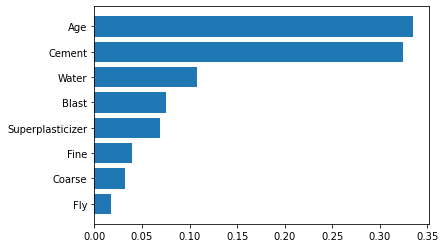

In [25]:
import matplotlib.pyplot as plt
df_imp=pd.DataFrame({
    'Features':list(X.columns),
    'Importance':list(rand_frst_reg.feature_importances_)
})
df_imp=df_imp.sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.show()

In [32]:
max_feature=[2,3,4,5,6,10]
n_estim=[150,100,50,16,10]
score=[]
for i in max_feature:
    for n in n_estim:
        rand_frst_reg=RandomForestRegressor(max_features=i,n_estimators=n,random_state=25)
        rand_frst_reg.fit(X_train,y_train)
        y_pred=rand_frst_reg.predict(X_test)
        score.append([i,n,r2_score(y_test,y_pred)])
scores_df=pd.DataFrame(score,columns=['max_feature','n_estimators','r2_score'])
scores_df.sort_values(by='r2_score',ascending=False,inplace=True)
scores_df.head()

,max_feature,n_estimators,r2_score
11,4,16,0.892649
12,5,150,0.890931
16,6,150,0.890446
13,5,100,0.888137
17,6,100,0.887851
